In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ipl-matches.csv')

In [4]:
df.shape

(950, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             950 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [6]:
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [7]:
df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [13]:
df.isnull().sum()

ID                   0
City                 0
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [16]:
df[df['SuperOver'].isnull() | df['WinningTeam'].isnull() | df['Margin'].isnull()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
114,1254077,Chennai,2021-04-25,2021,20,Delhi Capitals,Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk, Chennai",Delhi Capitals,bat,Y,Delhi Capitals,SuperOver,NaN,NaN,PP Shaw,"['PP Shaw', 'S Dhawan', 'RR Pant', 'SPD Smith'...","['DA Warner', 'JM Bairstow', 'KS Williamson', ...",CB Gaffaney,KN Ananthapadmanabhan
158,1216512,Abu Dhabi,2020-10-18,2020/21,35,Kolkata Knight Riders,Sunrisers Hyderabad,Sheikh Zayed Stadium,Sunrisers Hyderabad,field,Y,Kolkata Knight Riders,SuperOver,NaN,NaN,LH Ferguson,"['Shubman Gill', 'RA Tripathi', 'N Rana', 'AD ...","['JM Bairstow', 'KS Williamson', 'PK Garg', 'D...",PG Pathak,S Ravi
159,1216517,Dubai,2020-10-18,2020/21,36,Mumbai Indians,Kings XI Punjab,Dubai International Cricket Stadium,Mumbai Indians,bat,Y,Kings XI Punjab,SuperOver,NaN,NaN,KL Rahul,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['KL Rahul', 'MA Agarwal', 'CH Gayle', 'N Poor...",Nitin Menon,PR Reiffel
184,1216547,Dubai,2020-09-28,2020/21,10,Royal Challengers Bangalore,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,field,Y,Royal Challengers Bangalore,SuperOver,NaN,NaN,AB de Villiers,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",Nitin Menon,PR Reiffel
192,1216493,Dubai,2020-09-20,2020/21,2,Delhi Capitals,Kings XI Punjab,Dubai International Cricket Stadium,Kings XI Punjab,field,Y,Delhi Capitals,SuperOver,NaN,NaN,MP Stoinis,"['PP Shaw', 'S Dhawan', 'SO Hetmyer', 'SS Iyer...","['KL Rahul', 'MA Agarwal', 'KK Nair', 'N Poora...",AK Chaudhary,Nitin Menon
203,1178426,Mumbai,2019-05-02,2019,51,Mumbai Indians,Sunrisers Hyderabad,Wankhede Stadium,Mumbai Indians,bat,Y,Mumbai Indians,SuperOver,NaN,NaN,JJ Bumrah,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'E Lewi...","['WP Saha', 'MJ Guptill', 'MK Pandey', 'KS Wil...",CK Nandan,S Ravi
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
244,1175365,Delhi,2019-03-30,2019,10,Kolkata Knight Riders,Delhi Capitals,Arun Jaitley Stadium,Delhi Capitals,field,Y,Delhi Capitals,SuperOver,NaN,NaN,PP Shaw,"['NS Naik', 'CA Lynn', 'RV Uthappa', 'N Rana',...","['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",AY Dandekar,Nitin Menon
339,1082625,Rajkot,2017-04-29,2017,35,Gujarat Lions,Mumbai Indians,Saurashtra Cricket Association Stadium,Gujarat Lions,bat,Y,Mumbai Indians,SuperOver,NaN,NaN,KH Pandya,"['Ishan Kishan', 'BB McCullum', 'SK Raina', 'A...","['PA Patel', 'JC Buttler', 'N Rana', 'RG Sharm...",AK Chaudhary,CB Gaffaney
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan


In [8]:
df.sample()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
874,392200,Durban,2009-04-29,2009,20,Kings XI Punjab,Mumbai Indians,Kingsmead,Kings XI Punjab,bat,N,Kings XI Punjab,Runs,3.0,NaN,KC Sangakkara,"['RS Bopara', 'K Goel', 'KC Sangakkara', 'Yuvr...","['ST Jayasuriya', 'SR Tendulkar', 'S Dhawan', ...",MR Benson,SL Shastri


In [32]:
df['method'].sample()

889    D/L
Name: method, dtype: object

In [9]:
df.iloc[889]

ID                                                            392183
City                                                       Cape Town
Date                                                      2009-04-19
Season                                                          2009
MatchNumber                                                        3
Team1                                               Delhi Daredevils
Team2                                                Kings XI Punjab
Venue                                                       Newlands
TossWinner                                          Delhi Daredevils
TossDecision                                                   field
SuperOver                                                          N
WinningTeam                                         Delhi Daredevils
WonBy                                                        Wickets
Margin                                                          10.0
method                            

In [58]:
unique_team = pd.concat([df['Team1'], df['Team2']]).unique()
print(unique_team)

['Rajasthan Royals' 'Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Delhi Capitals' 'Chennai Super Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Kolkata Knight Riders' 'Punjab Kings'
 'Mumbai Indians' 'Rising Pune Supergiant' 'Gujarat Lions' 'Pune Warriors'
 'Deccan Chargers' 'Kochi Tuskers Kerala']


In [59]:
team_replacements = {
    'Delhi Daredevils': 'Delhi Capitals', 
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Kings XI Punjab': 'Punjab Kings'
}
df.replace(team_replacements, inplace=True)

In [60]:
unique_venue = df['Venue'].unique()
unique_venue

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'M Chinnaswamy Stadium', 'Eeden Gardens, Kolkata',
       'Sawai Mansingh Stadium', 'Holkar Cricket Stadium', 'Green Park',
       'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Barabati Stadium',
       'Subrata Roy Sahara Stadium',
       'Himachal Pradesh Cr

In [61]:
venue_replacements = {
    'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium, Ahmedabad',
    'Eeden Gardens': 'Eden Gardens, Kolkata',
    'Eden Gardens': 'Eeden Gardens, Kolkata',
    'Wankhede Stadium': 'Wankhede Stadium, Mumbai',
    'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
    'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy, Mumbai',
    'Maharashtra Cricket Association Stadium': 'Maharashtra Cricket Association Stadium, Pune',
    'MA Chidambaram Stadium': 'MA Chidambaram Stadium, Chepauk, Chennai',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium, Chepauk, Chennai',
    'Arun Jaitley Stadium': 'Arun Jaitley Stadium, Delhi',
    'Feroz Shah Kotla': 'Arun Jaitley Stadium, Delhi',
    'Rajiv Gandhi International Stadium': 'Rajiv Gandhi International Stadium, Uppal',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
}

df.replace(venue_replacements, inplace=True)

In [30]:
venue = df['Venue'].unique()
venue

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'M Chinnaswamy Stadium', 'Eeden Gardens, Kolkata',
       'Sawai Mansingh Stadium', 'Holkar Cricket Stadium', 'Green Park',
       'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Barabati Stadium',
       'Subrata Roy Sahara Stadium',
       'Himachal Pradesh Cr

In [62]:
mat = df[(df['Team1'] == 'Delhi Daredevils') | (df['Team2'] == 'Delhi Daredevils')] 
mat.shape

(0, 20)

# Which team has won the most IPL matches across all seasons.

In [63]:
most_wins = df['WinningTeam'].value_counts().reset_index()
most_wins.columns = ['Team', 'Total Wins']
most_wins.head()

,Team,Total Wins
0,Mumbai Indians,131
1,Chennai Super Kings,121
2,Kolkata Knight Riders,114
3,Royal Challengers Bangalore,109
4,Delhi Capitals,103


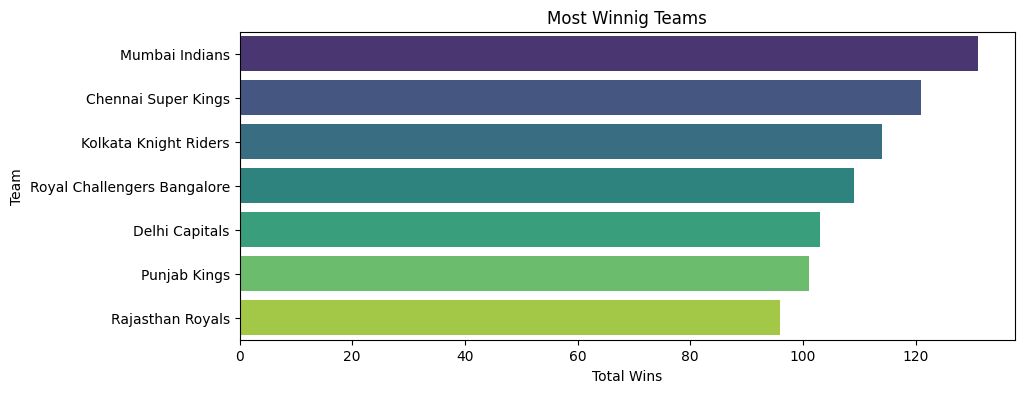

In [64]:
plt.figure(figsize=(10,4))
sns.barplot(y='Team', x='Total Wins', data = most_wins.head(7),palette= 'viridis',hue='Team')
plt.title('Most Winnig Teams')
plt.show()

# Which city has hosted the most IPL Matches

In [65]:
city_counts = df['City'].value_counts().reset_index()
city_counts.columns=['City','Total Matches']
city_counts.head()

,City,Total Matches
0,Mumbai,159
1,Kolkata,79
2,Delhi,78
3,Chennai,67
4,Bangalore,65


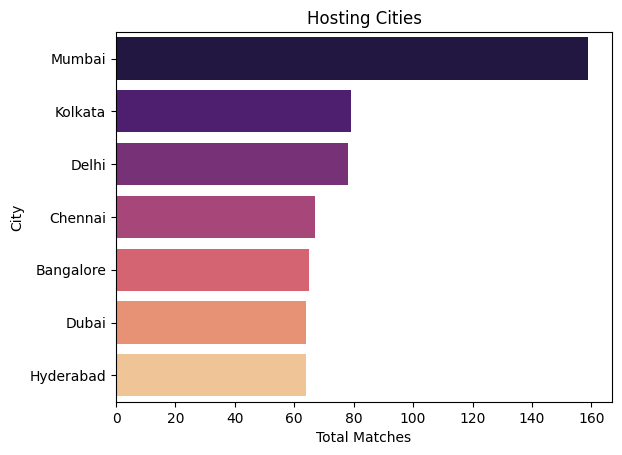

In [26]:
sns.barplot(y='City', x='Total Matches', data=city_counts.head(7),palette='magma',hue='City')
plt.title('Hosting Cities')
plt.show()

# Which venue has the most wins by batting 1st vs chasing?

In [66]:
venue_wins = df.groupby(['Venue', 'WonBy']).size().unstack().fillna(0)
venue_wins.sort_values('Runs', ascending = False)

WonBy,NoResults,Runs,SuperOver,Wickets
Venue,,,,
"Wankhede Stadium, Mumbai",0.0,47.0,1.0,56.0
"MA Chidambaram Stadium, Chepauk, Chennai",0.0,39.0,2.0,26.0
"Arun Jaitley Stadium, Delhi",1.0,36.0,1.0,40.0
M Chinnaswamy Stadium,3.0,33.0,1.0,43.0
"Eeden Gardens, Kolkata",0.0,32.0,0.0,45.0
"Rajiv Gandhi International Stadium, Uppal",0.0,28.0,1.0,35.0
"Punjab Cricket Association IS Bindra Stadium, Mohali",0.0,24.0,0.0,32.0
Dubai International Cricket Stadium,0.0,21.0,3.0,22.0
"Maharashtra Cricket Association Stadium, Pune",0.0,18.0,0.0,17.0


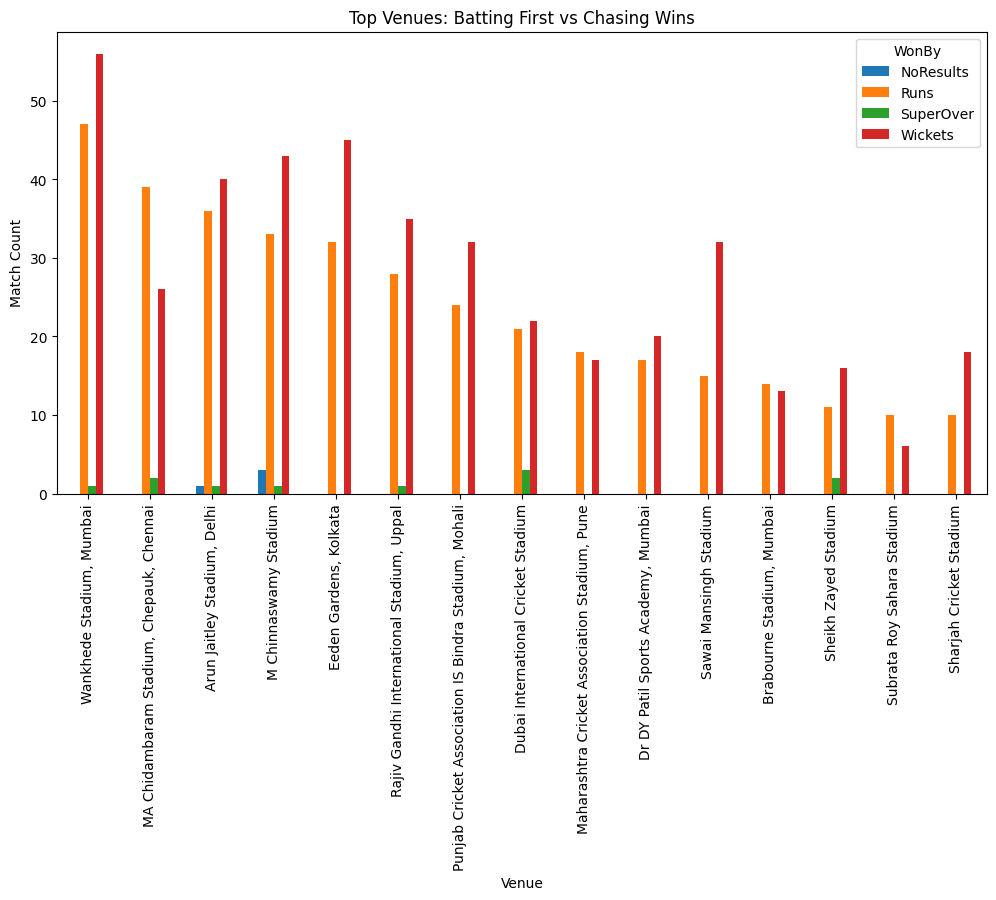

In [67]:
venue_wins.sort_values('Runs', ascending=False).head(15).plot(kind='bar', figsize=(12, 6))
plt.title("Top Venues: Batting First vs Chasing Wins")
plt.ylabel("Match Count")
plt.show()

#  Find players who have won most "Player of the Matches".

In [68]:
mom = df['Player_of_Match'].value_counts().reset_index()
mom.columns = ['Player', 'Player of Match']
mom.head(10)

,Player,Player of Match
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,18
3,DA Warner,18
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,16
7,KA Pollard,14
8,SK Raina,14
9,V Kohli,14


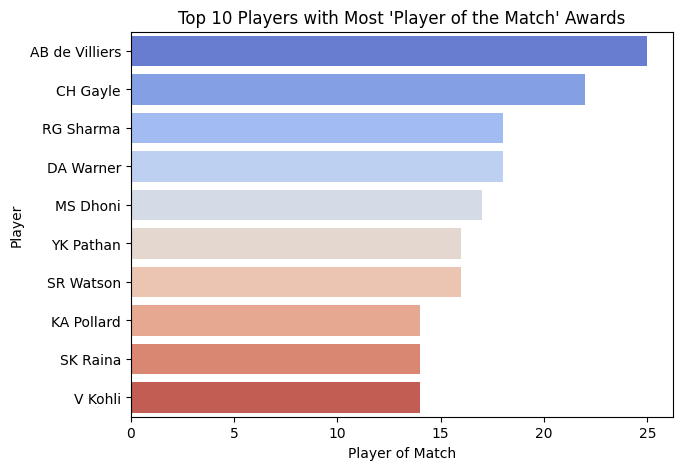

In [69]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Player of Match', y='Player', palette='coolwarm', data=mom.head(10),hue='Player')
plt.title("Top 10 Players with Most 'Player of the Match' Awards")
plt.show()

# How does the toss decision affect the match outcome?

In [70]:
toss_win = df.groupby(['TossDecision', 'WinningTeam']).size().unstack().fillna(0)
toss_win

WinningTeam,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Gujarat Lions,Gujarat Titans,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Royal Challengers Bangalore,Sunrisers Hyderabad
TossDecision,,,,,,,,,,,,,,,
bat,59.0,14.0,37.0,2.0,5.0,0.0,42.0,2.0,52.0,9.0,26.0,40.0,2.0,35.0,25.0
field,62.0,15.0,66.0,11.0,7.0,6.0,72.0,7.0,79.0,3.0,75.0,56.0,13.0,74.0,50.0


In [73]:
toss_win.sum(axis=1)

TossDecision
bat      350.0
field    596.0
dtype: float64

In [86]:
toss_win = toss_win.assign(total_wins = toss_win.sum(axis=1))
# toss_win.loc[:, "total_wins"] = toss_win.sum(axis=1)
# toss_win.drop(columns=['total_wins'], inplace=True)
toss_win

WinningTeam,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Gujarat Lions,Gujarat Titans,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Royal Challengers Bangalore,Sunrisers Hyderabad,total_wins
TossDecision,,,,,,,,,,,,,,,,
bat,59.0,14.0,37.0,2.0,5.0,0.0,42.0,2.0,52.0,9.0,26.0,40.0,2.0,35.0,25.0,350.0
field,62.0,15.0,66.0,11.0,7.0,6.0,72.0,7.0,79.0,3.0,75.0,56.0,13.0,74.0,50.0,596.0


# Which IPL season had the closest matches (smallest winning margins)?

In [90]:
df.sample(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
148,1216520,NaN,2020-10-26,2020/21,46,Kolkata Knight Riders,Punjab Kings,Sharjah Cricket Stadium,Punjab Kings,field,N,Punjab Kings,Wickets,8.0,NaN,CH Gayle,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'KD ...","['KL Rahul', 'Mandeep Singh', 'CH Gayle', 'N P...",KN Ananthapadmanabhan,RK Illingworth
445,829799,Hyderabad,2015-05-11,2015,48,Sunrisers Hyderabad,Punjab Kings,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,bat,N,Sunrisers Hyderabad,Runs,5.0,NaN,DA Warner,"['DA Warner', 'S Dhawan', 'MC Henriques', 'EJG...","['M Vijay', 'M Vohra', 'WP Saha', 'GJ Maxwell'...",AK Chaudhary,HDPK Dharmasena


In [87]:
# close_matches = df[(df['Margin'] <= 10) & (df['WonBy'] == 'Runs')]
# close_matches = df[(df['Margin'] <= 5) & (df['WonBy'] == 'Wickets')]
close_matches = df[((df['WonBy'] == 'Wickets') & (df['Margin'] == 2)) | ((df['WonBy'] == 'Runs') & (df['Margin'] <= 10 ))]
close_matches_by_season = close_matches['Season'].value_counts().sort_index()

In [73]:
close_matches_by_season.sort_values(ascending = False)

Season
2021       11
2015        9
2007/08     9
2013        8
2017        8
2009        8
2012        8
2018        8
2016        8
2022        7
2011        6
2019        6
2009/10     4
2014        4
2020/21     4
Name: count, dtype: int64

# How many Super Overs are played in each season? 

In [95]:
(df['SuperOver'] == 'Y').value_counts()

SuperOver
False    936
True      14
Name: count, dtype: int64

In [81]:
df[df['SuperOver'] == 'Y']['Season'].value_counts() 

Season
2020/21    4
2013       2
2019       2
2021       1
2017       1
2015       1
2014       1
2009/10    1
2009       1
Name: count, dtype: int64

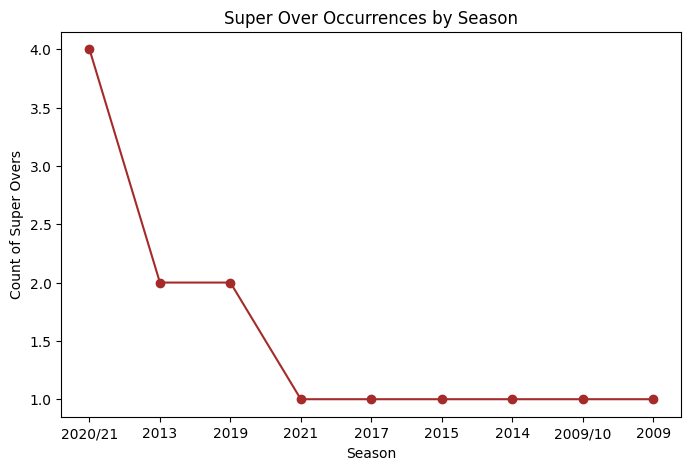

In [88]:
plt.figure(figsize=(8, 5))
super_over_count.plot(kind='line', marker='o', color='brown')
plt.title("Super Over Occurrences by Season")
plt.ylabel("Count of Super Overs")
plt.show()

#  Which players have won "Player of the Match" for different teams?

In [94]:
player_team_counts = df.groupby('Player_of_Match')['WinningTeam'].nunique()
multi_team_players = player_team_counts[player_team_counts > 1].sort_values(ascending=False).reset_index()
multi_team_players.head(10)


,Player_of_Match,WinningTeam
0,KD Karthik,5
1,A Nehra,4
2,JD Unadkat,4
3,DR Smith,4
4,R Ashwin,4
5,S Dhawan,4
6,MK Pandey,4
7,WP Saha,4
8,Yuvraj Singh,4
9,BB McCullum,3


# Player with most appearance in final match.

In [95]:
df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [95]:
def getPlayers(players):
  return pd.Series(list(map( lambda x: x.strip("'"), players.strip("'[").rstrip("]'").split(", "))))

df1 = df[df['MatchNumber'] == 'Final']
df1
all_players = pd.Series()
for players in df1['Team1Players']:
    x = getPlayers(players)
    all_players = pd.concat([all_players, x])

for players in df1['Team2Players']:
    x = getPlayers(players)
    all_players = pd.concat([all_players, x])

all_players.value_counts().head(10)

MS Dhoni       10
SK Raina        8
R Ashwin        7
RA Jadeja       7
AT Rayudu       7
DJ Bravo        7
KA Pollard      6
RG Sharma       6
SL Malinga      5
S Badrinath     5
Name: count, dtype: int64

# Make a dataframe of each team in IPL with details like - Team Name, Matches Played, Win%, Home Win%, Away Win%.

In [96]:
df1 = df[~df['WinningTeam'].isnull()] 
teams = df1['Team1'].unique()
data = []

for team in teams:
    played = df1[(df1['Team1'] == team) | (df1['Team2'] == team)].shape[0]
    
    wins = df1[df1['WinningTeam'] == team].shape[0]
    
    home_wins = df1[(df1['Team1'] == team) & (df1['WinningTeam'] == team)].shape[0]
    away_wins = df1[(df1['Team2'] == team) & (df1['WinningTeam'] == team)].shape[0]
    
    win_percentage = round((wins / played) * 100, 2) if played > 0 else 0
    home_matches = df1[df1['Team1'] == team].shape[0]
    away_matches = df1[df1['Team2'] == team].shape[0]

    home_win_percentage = round((home_wins / home_matches) * 100, 2) if home_matches > 0 else 0
    away_win_percentage = round((away_wins / away_matches) * 100, 2) if away_matches > 0 else 0

    data.append([team, played, win_percentage, home_win_percentage, away_win_percentage])

new_ipl = pd.DataFrame(data, columns=['Team', 'MatchesPlayed', 'Win%', 'HomeWin%', 'AwayWin%'])

new_ipl.sort_values(by='Win%', inplace=True, ascending=False)
new_ipl


,Team,MatchesPlayed,Win%,HomeWin%,AwayWin%
5,Gujarat Titans,16,75.00,57.14,88.89
6,Lucknow Super Giants,15,60.00,87.50,28.57
4,Chennai Super Kings,208,58.17,58.56,57.73
9,Mumbai Indians,231,56.71,58.04,55.46
7,Kolkata Knight Riders,223,51.12,53.33,49.15
0,Rajasthan Royals,190,50.53,55.06,46.53
10,Rising Pune Supergiant,30,50.00,50.00,50.00
2,Sunrisers Hyderabad,152,49.34,52.17,46.99
1,Royal Challengers Bangalore,223,48.88,49.59,48.00
3,Delhi Capitals,222,46.40,46.90,45.87


# Make a IPL Point Table for every season. 

In [97]:
def matches_played(df, team):
  return df[(df['Team1'] == team) | (df['Team2'] == team)].shape[0]

def matches_won(df,team):
  return df[df['WinningTeam'] == team].shape[0]

def matches_draw(df,team):
  return df[((df['Team1'] == team) | (df['Team2'] == team)) & (df['WinningTeam'].isnull())].shape[0]

def point_table(season):
  df_season = df[df['Season'] == season]
  new_df = pd.DataFrame()
  new_df['TeamName'] = df_season['Team1'].unique()
  new_df['MatchesPlayed'] = new_df['TeamName'].apply(lambda x: matches_played(df,x))
  new_df['MatchesWon'] = new_df['TeamName'].apply(lambda x: matches_won(df,x))
  new_df['NoResult'] = new_df['TeamName'].apply(lambda x: matches_draw(df,x))
  new_df['Points'] = new_df['MatchesWon']*2 + new_df['NoResult']
  new_df.sort_values('Points', ascending=False, inplace=True)
  new_df.set_index('TeamName', inplace=True)
  return new_df

point_table('2021')

,MatchesPlayed,MatchesWon,NoResult,Points
TeamName,,,,
Mumbai Indians,231,131,0,262
Chennai Super Kings,208,121,0,242
Kolkata Knight Riders,223,114,0,228
Royal Challengers Bangalore,226,109,3,221
Delhi Capitals,224,103,2,208
Punjab Kings,218,101,0,202
Rajasthan Royals,192,96,2,194
Sunrisers Hyderabad,152,75,0,150
